# Flammability Part 2

Download lecture freeform here: https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/311Flammability.pdf 

## Python Flammability Diagram

Below code submitted by [Isaac Matthews](https://www.linkedin.com/in/isaac-matthews-2a0244290/), 2024.

Requirements for the equalateral flammability diagram below:
#pip install matplotlib, python-ternary; the below code wont work if you install ternary, 

/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


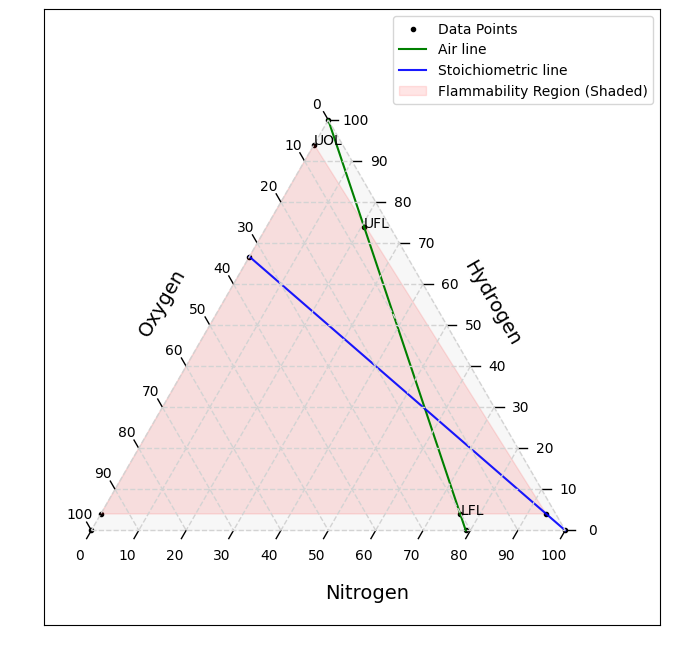

In [1]:
import matplotlib.pyplot as plt
import ternary
from scipy.optimize import fsolve
ufl = 74
lfl = 4
stoic = 66.7 #stoichiometric ratio for hydrogen in oxygen
loc = 2

def flammabilityTriangle(name,lfl, ufl, stoic,loc,figsize = (10, 8)):
    # The stoic value is the stoichiometric ratio of fuel in pure oxygen
    lfl_o = (100-lfl)*0.21; ufl_o = (100-ufl)*0.21
    lfl_n = 100 - lfl - lfl_o; ufl_n = 100 - ufl - ufl_o
    slope = 1/(100/stoic-1) # z/y or ratio of fuel to oxygen at stoichiometric mixture
    def eq(vars):
        x, y = vars #x is n2, y is o2
        denom = x+y*(1+slope)
        eq1 = loc/100 - y/(denom)
        eq2 = loc/100 + x/denom + y*slope/denom - 1
        return eq1, eq2
    mol_n2, mol_o2 = fsolve(eq, (0.5, 0.5)); mol_f = slope*mol_o2
    loc_f = mol_f/(mol_n2+mol_o2+mol_f)*100
    uol = ufl*(100+1.87*(100-ufl_o))/(ufl_o+ufl*(1+1.87)) #upper flammability limit in pure oxygen
    lol = lfl
    data = [
         #nitrogen fuel oxygen
        [0, 0, 100],  # Pure Oxygen 0
        [79, 0, 21],  # Pure Air 1
        [0, 100, 0],  # Pure Fuel 2
        [100,0,0],    # pure n2  3
        [lfl_n, lfl, lfl_o],  #LFL  4
        [ufl_n,ufl,ufl_o],    #UFL  5
        [0,uol,100-uol], #upper loc 6 (uol)
        [0,stoic,100-stoic], #left most stoic point  7
        [100-loc-loc_f, loc_f,loc],#intersection  8 (actual loc at stoichiometric point)
        [0,lol,100-lol], #lol 9
        # Add more data points as needed
    ]
    # Create a larger figure
    whole = plt.figure(figsize=figsize)
    box = whole.subplots()
    # Create a ternary plot
    fig, tax = ternary.figure(ax = box, scale=100)
    #fix what terniary messes up
    box.set_ylim(-20,110)
    box.set_xlim(-10,120)
    box.set_aspect(1)
    box.tick_params(axis='both', which='both', length=0,labelcolor = 'white') #if you can't beat them join them

    tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.02, clockwise=False)
    # Plot data points
    tax.scatter(data, marker='.', color='k', label='Data Points')

    # Add a line between pure fuel and pure air
    tax.line(data[2], data[1], color='green', linestyle='-',label = "Air line")
    #tax.line(data[9], data[8], color='red', alpha=0.6, linestyle='--', label = "Flammability region")
    tax.line(data[3], data[7], color='blue', alpha=0.9, linestyle='-', label = "Stoichiometric line")
    #tax.line(data[6], data[8], color='red', alpha=0.6, linestyle='--')

    # --- Corrected part for shading (hopefully for good this time!) ---
    # Define the vertices of the flammability region in ternary coordinates
    flammability_vertices_ternary = [data[9], data[8], data[6]]

    # Convert ternary coordinates to Cartesian (x, y) coordinates for matplotlib's fill
    flammability_vertices_cartesian = ternary.helpers.project_sequence(flammability_vertices_ternary)

    # Use the underlying matplotlib axes (box) to fill the region
    box.fill(
        flammability_vertices_cartesian[0], # X coordinates
        flammability_vertices_cartesian[1], # Y coordinates
        color='red',
        alpha=0.1,
        label="Flammability Region (Shaded)"
    )
    # --- End of corrected part ---

    # Customize the plot
    #tax.set_title(f"Flammability Triangle for {name} in Air", fontsize=16)
    tax.left_axis_label("Oxygen", fontsize=14, offset=0.1)
    tax.right_axis_label(name, fontsize=14, offset=0.02)
    tax.bottom_axis_label("Nitrogen", fontsize=14, offset=-.1)
    tax.gridlines(color="lightgrey", multiple=10, linewidth=1, linestyle='--')

    # Define labels for data points
    labels = ["", "", "","","LFL","UFL","UOL","","",""]

    # Add labels for data points
    for i, point in enumerate(data):
        tax.annotate(labels[i], position=point, fontsize=10)

    # Add legend
    tax.legend()

    # Show the plot
    plt.ticks = False
    plt.show()

flammabilityTriangle("Hydrogen", lfl,ufl,stoic,loc)